In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('DATA/kc_house_data.csv')
df=df.drop('id',axis=1)
df=df.drop('zipcode',axis=1)
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)
df=df.drop('date',axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X=df.drop('price',axis=1).values
y=df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model=Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

In [13]:
model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 430238564352.0000 - val_loss: 418906439680.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429082050560.0000 - val_loss: 414943051776.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 413589667840.0000 - val_loss: 379683733504.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 337799184384.0000 - val_loss: 256763838464.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 186992574464.0000 - val_loss: 116869120000.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 105105465344.0000 - val_loss: 95476269056.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 97793490944.0000 - val_loss: 93894483968.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 96106881024.0000 - val_loss: 92272181248.0000
Epoch 9/400
119/119 [

In [14]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

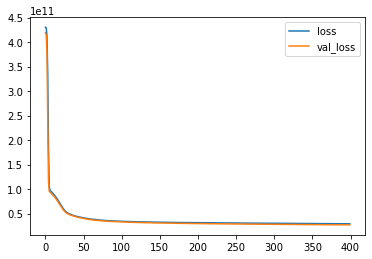

In [15]:
losses.plot()

In [26]:
single_house = df.drop('price',axis=1).iloc[0]

In [27]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [28]:
model.predict(single_house)

1/1 [==============================] - 0s 134ms/step


array([[290609.78]], dtype=float32)